<a href="https://colab.research.google.com/github/rohithpaul0304/Is-it-a-Butterfly-or-a-Moth/blob/master/Butterfly_and_Moth_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Butterfly and Moth Classifier**

In [0]:
from fastai import *
from fastai.vision import *

## **Create directory and upload urls file into your server**

In [0]:
folder = 'moths'
file = 'urls_moths.csv'

In [0]:
folder = 'butterfly'
file = 'urls_butterfly.csv'

In [0]:
path = Path('data/Lepidoptera')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[PosixPath('data/Lepidoptera/urls_moths.csv'),
 PosixPath('data/Lepidoptera/moths'),
 PosixPath('data/Lepidoptera/urls_butterfly.csv'),
 PosixPath('data/Lepidoptera/butterfly')]

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## **Download images**

In [0]:
classes = ['moths','butterfly']

In [0]:
np.random.seed(12)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [46]:
data.classes

['butterfly', 'moths']

## **View data**

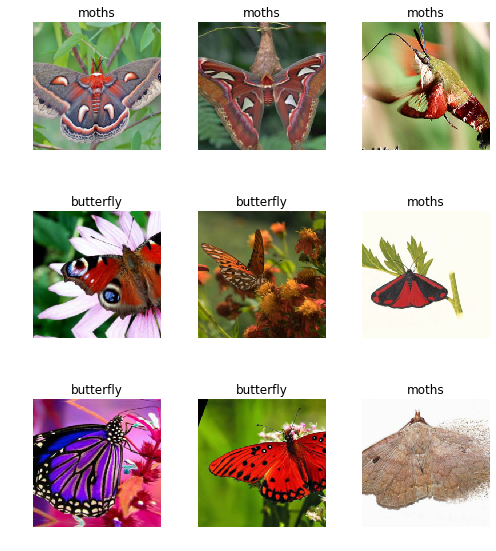

In [47]:
data.show_batch(rows=3, figsize=(7,8))

In [48]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['butterfly', 'moths'], 2, 293, 73)

## **Train model**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [50]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.871395,0.427228,0.178082,00:06
1,0.602713,0.237177,0.054795,00:06
2,0.466437,0.212629,0.082192,00:06
3,0.389110,0.204653,0.082192,00:06
4,0.352154,0.206393,0.095890,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [53]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


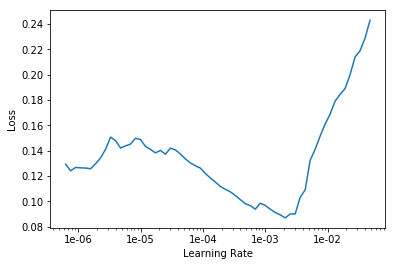

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.170440,0.202140,0.054795,00:06
1,0.134051,0.315131,0.109589,00:07


In [0]:
learn.save('stage-2')

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


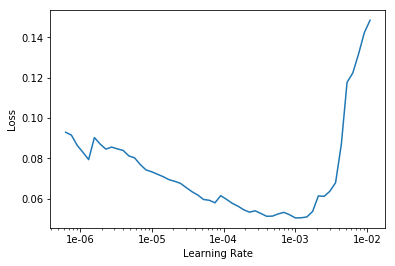

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.071829,0.328403,0.123288,00:06
1,0.067361,0.322655,0.109589,00:07


In [0]:
learn.save('stage-3')

In [0]:
learn.load('stage-3');

## **Interpretation**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

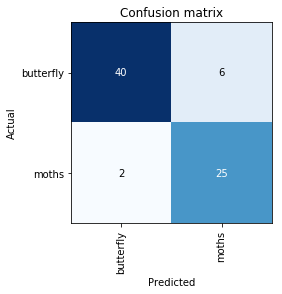

In [63]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

## **Cleaning up the data**

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

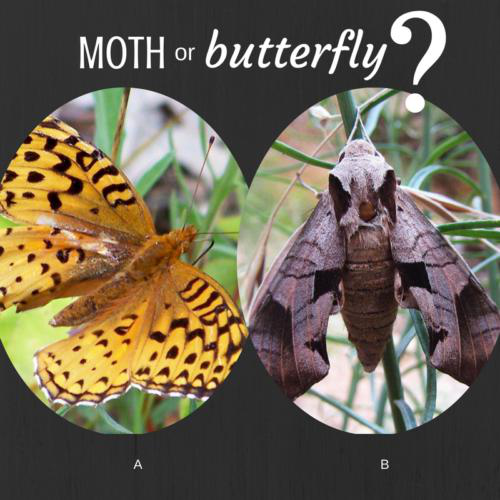

In [38]:
ds.x[idxs[0]]

In [40]:
ds.to_df().iloc[idxs[:10]]

,x,y
236,butterfly/00000158.jpg,butterfly
16,moths/00000008.jpg,moths
106,moths/00000005.jpg,moths
95,moths/00000141.jpg,moths
67,moths/00000045.jpg,moths
101,moths/00000052.jpg,moths
124,moths/00000011.jpg,moths
116,moths/00000094.jpg,moths
5,moths/00000175.jpg,moths
33,moths/00000013.jpg,moths


In [0]:
learn.export()

## **Testing the model**

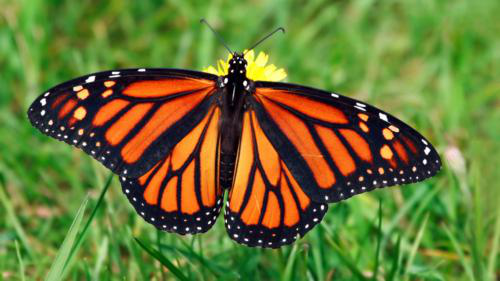

In [66]:
img = open_image(path/'butterfly'/'00000041.jpg')
img

In [0]:
learn = load_learner(path)

In [68]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category butterfly

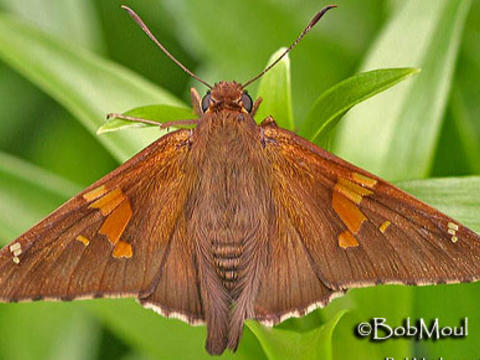

In [71]:
img2 = open_image(path/'moths'/'00000060.jpg')
img2

In [72]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class

Category moths